### Classifying and predicting early hospital readmissions:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [46]:
from fastai.tabular import * 
from fastai.callbacks import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [47]:
plt.rcParams['figure.figsize'] = [10, 10]

In [48]:
with open("x_liv.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    df['early_readmit'] = pickle.load(picklefile)

In [49]:
np.unique(list(df['early_readmit']))

array(['<30', '>30', 'NO'], dtype='<U3')

In [50]:
len(df)

100114

In [51]:
df.head()

,Intercept,race[T.AfricanAmerican],race[T.Asian],race[T.Caucasian],race[T.Hispanic],race[T.Other],gender[T.Male],gender[T.Unknown/Invalid],age[T.[10-20)],age[T.[20-30)],...,diabetesMed[T.Yes],time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,early_readmit
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,NO
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,>30
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,NO
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,NO
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,NO


In [52]:
df['early_readmit'] = df['early_readmit'].replace({'<30':1, '>30':0, 'NO':0})
df.head()

,Intercept,race[T.AfricanAmerican],race[T.Asian],race[T.Caucasian],race[T.Hispanic],race[T.Other],gender[T.Male],gender[T.Unknown/Invalid],age[T.[10-20)],age[T.[20-30)],...,diabetesMed[T.Yes],time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,early_readmit
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0


In [53]:
dep_var = 'early_readmit'

In [54]:
procs = [FillMissing, Categorify, Normalize]

In [58]:
X_test

,Intercept,race[T.AfricanAmerican],race[T.Asian],race[T.Caucasian],race[T.Hispanic],race[T.Other],gender[T.Male],gender[T.Unknown/Invalid],age[T.[10-20)],age[T.[20-30)],...,diabetesMed[T.Yes],time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,early_readmit
34472,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,30.0,0.0,16.0,0.0,0.0,1.0,5.0,0
19165,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,20.0,0.0,21.0,0.0,2.0,6.0,9.0,0
5493,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,64.0,1.0,8.0,0.0,0.0,0.0,9.0,0
68671,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,57.0,0.0,7.0,1.0,0.0,0.0,8.0,0
3392,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,23.0,0.0,19.0,0.0,0.0,0.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26752,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,6.0,29.0,0.0,6.0,0.0,0.0,0.0,5.0,0
31423,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,13.0,0.0,15.0,1.0,0.0,0.0,7.0,0
93037,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,48.0,1.0,8.0,0.0,0.0,0.0,6.0,1
42199,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,65.0,1.0,23.0,0.0,0.0,1.0,9.0,1


In [59]:
df, X_test, df['early_readmit'], y_test = train_test_split(df, df['early_readmit'], test_size=0.33, random_state=42, stratify=df['early_readmit'])
scaler = StandardScaler()
df[df.columns[~df.columns.isin(['early_readmit'])]] = scaler.fit_transform(df[df.columns[~df.columns.isin(['early_readmit'])]])
X_test[X_test.columns[~X_test.columns.isin(['early_readmit'])]] = scaler.transform(X_test[X_test.columns[~X_test.columns.isin(['early_readmit'])]])

In [60]:
smote = SMOTE()
x_sm, y_sm = smote.fit_sample(df, df['early_readmit'])
df = pd.DataFrame(x_sm, columns=df.columns)
df['early_readmit'] = y_sm

In [61]:
train_idx, valid_idx = next(StratifiedKFold(n_splits=10).split(df, df['early_readmit']))

In [62]:
data = TabularDataBunch.from_df(df=df, test_df=X_test, path='.', dep_var=dep_var, valid_idx=valid_idx, procs=procs)

In [63]:
len(data.train_ds)

71714

In [64]:
len(data.valid_ds)

7970

In [65]:
len(data.test_ds)

22136

In [66]:
callback_fns = [ShowGraph, 
#                 SaveModelCallback(learn, every='improvement', monitor='val_loss', name='fastaimodel'),
                partial(EarlyStoppingCallback, monitor='val_loss', min_delta=0.01, patience=4)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


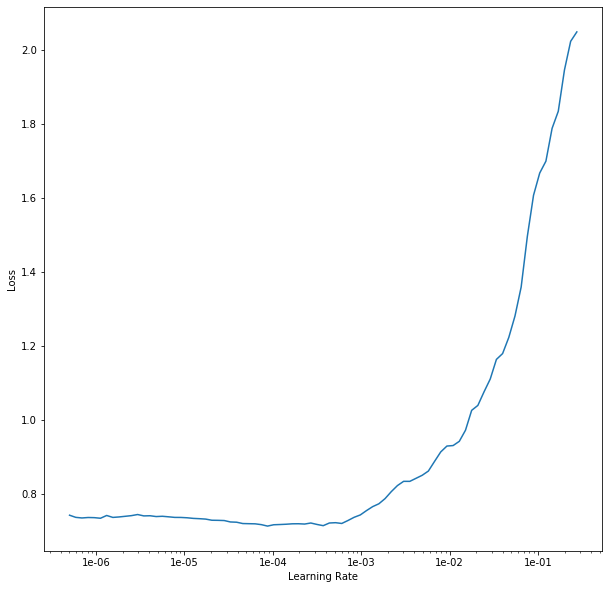

In [127]:
# Create deep learning model
learn = tabular_learner(data, 
#                         layers=[2000,1000,500,200,100,15], 
                        layers=[2000,2000], 
                        metrics=[AUROC()], 
                        emb_drop=0.1, 
                        callback_fns=callback_fns)

# # Create deep learning model
# learn = tabular_learner(data, 
#                         layers=[1000,650,500,250,125,100,100,100,50,25,10], 
#                         metrics=[AUROC()], 
#                         emb_drop=0.1, 
#                         callback_fns=callback_fns)
# learn.data.add_test(X_test)

# select the appropriate learning rate
learn.lr_find(end_lr=1)

# we typically find the point where the slope is steepest
learn.recorder.plot()

epoch,train_loss,valid_loss,auroc,time
0,0.321620,24.806866,0.755202,02:37


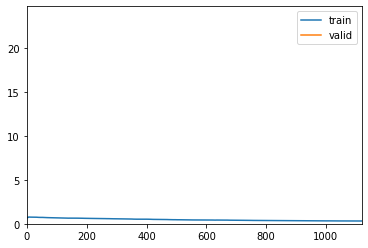

epoch,train_loss,valid_loss,auroc,time
0,0.278333,42.228733,0.773171,02:40
1,0.207167,36.256554,0.815327,02:42
2,0.160950,28.961349,0.830045,02:34
3,0.149434,26.072704,0.844849,02:37
4,0.124289,29.962421,0.871397,02:37
5,0.104816,63.404488,0.862955,02:42
6,0.095325,64.015549,0.872168,02:42
7,0.075738,18.294214,0.887240,02:43
8,0.068524,64.576645,0.893951,02:42
9,0.067665,72.420990,0.898409,02:44


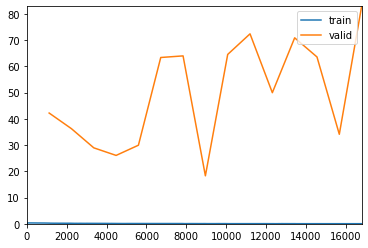

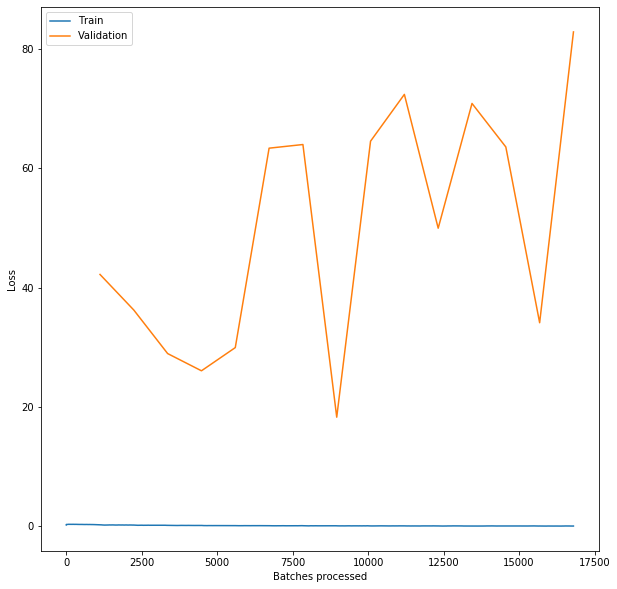

In [128]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(1, max_lr=1e-04)

learn.fit(epochs=15, lr=1e-04)

# Analyse our model
learn.model
learn.recorder.plot_losses()

In [129]:
y_preds_probas, y = learn.get_preds(ds_type=DatasetType.Test)

In [130]:
y_pred = torch.argmax(y_preds_probas, dim=1)

In [131]:
y_pred = np.array(y_pred)

In [132]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     19625
           1       0.25      0.07      0.11      2511

    accuracy                           0.87     22136
   macro avg       0.57      0.52      0.52     22136
weighted avg       0.82      0.87      0.84     22136



In [133]:
# np.array(list(y_preds_probas))[:,0]
np.array(y_preds_probas[:,1])

array([8.535267e-08, 5.288345e-01, 1.024026e-06, 1.803320e-07, ..., 8.162328e-06, 6.095509e-15, 0.000000e+00,
       1.177757e-02], dtype=float32)

Text(0.5, 1.0, 'Precision Recall Curve')

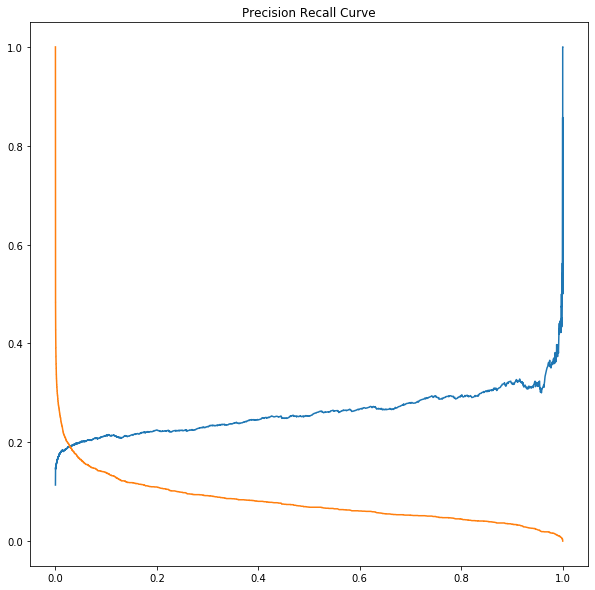

In [134]:
p, r, t = precision_recall_curve(y_test, np.array(y_preds_probas[:,1]))

# adding last threshold of '1' to threshold list
t = np.vstack([t.reshape([-1, 1]), 1])

plt.plot(t, p) 
plt.plot(t, r)
plt.title('Precision Recall Curve')

In [135]:
class_names = ["not early readmit", "early readmit"]

In [136]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=sns.color_palette("Blues")):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    ax = sns.heatmap(cm, cmap = cmap, annot=True, xticklabels=classes, yticklabels=classes)

    ax.set(title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the x labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Vertically center y labels
    plt.setp(ax.get_yticklabels(), va="center")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    return ax

Confusion matrix, without normalization
[[19116   509]
 [ 2339   172]]


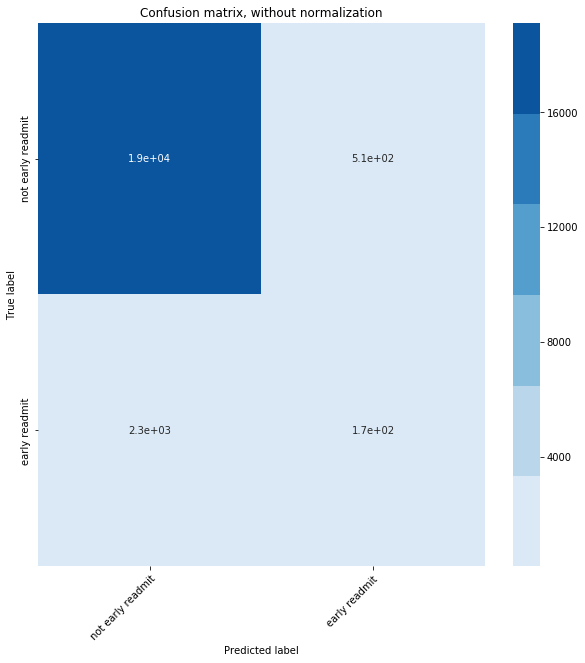

In [137]:
# Plot non-normalized confusion matrix
ax = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# plt.savefig('confusion_matrix_test.png', bbox_inches="tight")

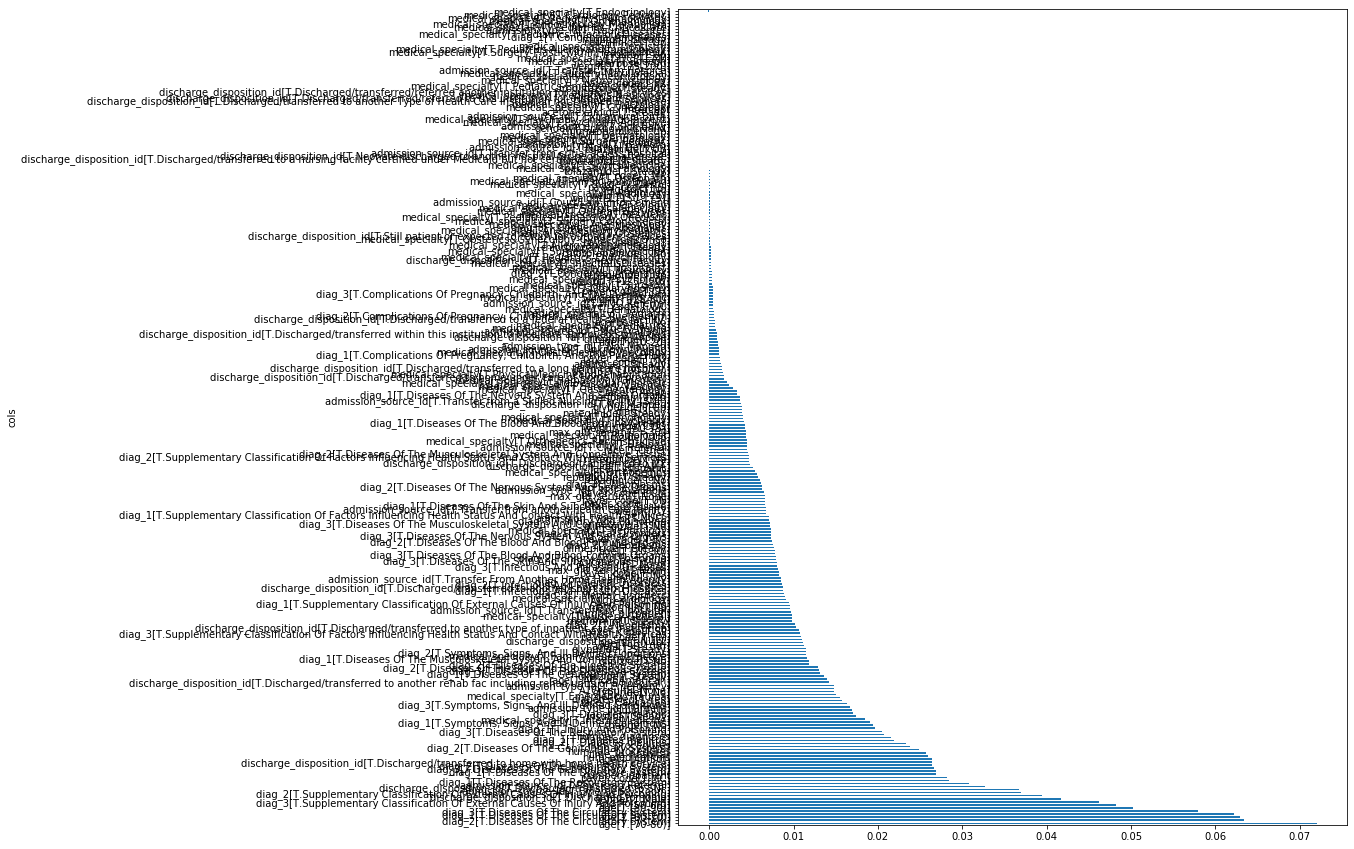

In [138]:
def feature_importance(learner): 
  # based on: https://medium.com/@mp.music93/neural-networks-feature-importance-with-fastai-5c393cf65815
    data = learner.data.train_ds.x
    cat_names = data.cat_names
    cont_names = data.cont_names
    loss0=np.array([learner.loss_func(learner.pred_batch(batch=(x,y.to("cpu"))), y.to("cpu")) for x,y in iter(learner.data.valid_dl)]).mean()
    fi=dict()
    types=[cat_names, cont_names]
    for j, t in enumerate(types):
      for i, c in enumerate(t):
        loss=[]
        for x,y in iter(learner.data.valid_dl):
          col=x[j][:,i]    #x[0] da hier cat-vars
          idx = torch.randperm(col.nelement())
          x[j][:,i] = col.view(-1)[idx].view(col.size())
          y=y.to('cpu')
          loss.append(learner.loss_func(learner.pred_batch(batch=(x,y)), y))
        fi[c]=np.array(loss).mean()-loss0
    d = sorted(fi.items(), key=lambda kv: kv[1], reverse=True)
    return pd.DataFrame({'cols': [l for l, v in d], 'imp': np.log1p([v for l, v in d])})
  
## my model is called 'learn'
features = feature_importance(learn)

## plot 'em!
features.plot('cols', 'imp', 'barh', figsize=(12,15), legend=False)

In [139]:
features

,cols,imp
0,age[T.[70-80)],7.201992e-02
1,diag_2[T.Diseases Of The Circulatory System],6.335922e-02
2,age[T.[60-70)],6.290282e-02
3,diag_1[T.Diseases Of The Circulatory System],6.226830e-02
4,diag_3[T.Diseases Of The Circulatory System],5.790638e-02
...,...,...
261,medical_specialty[T.Endocrinology-Metabolism],-2.980233e-07
262,medical_specialty[T.Ophthalmology],-2.980233e-07
263,medical_specialty[T.Pediatrics-Pulmonology],-4.172326e-07
264,medical_specialty[T.Cardiology-Pediatric],-7.599621e-06


In [140]:
features['abs'] = [abs(elem) for elem in features['imp']]
features.sort_values(by='abs', ascending=False).head(10)

,cols,imp,abs
0,age[T.[70-80)],0.072020,0.072020
1,diag_2[T.Diseases Of The Circulatory System],0.063359,0.063359
2,age[T.[60-70)],0.062903,0.062903
3,diag_1[T.Diseases Of The Circulatory System],0.062268,0.062268
4,diag_3[T.Diseases Of The Circulatory System],0.057906,0.057906
5,age[T.[80-90)],0.050226,0.050226
6,age[T.[50-60)],0.048205,0.048205
7,diag_3[T.Supplementary Classification Of Exter...,0.046216,0.046216
8,gender[T.Male],0.041720,0.041720
9,discharge_disposition_id[T.Discharged to home],0.039485,0.039485
